In [1]:
library("rcompanion")
library("car")
library("fastR2")

Loading required package: carData

Loading required package: mosaic

Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.


Attaching package: 'mosaic'


The following objects are masked from 'package:dplyr':

    count, do, tally


The following object is masked from 'package:Matrix':

    mean


The following object is masked from 'package:ggplot2':

    stat


The following objects are masked from 'package:car':

    deltaMethod, logit


The following objects are masked from 'package:stats':

    binom.test, cor, cor.test, cov, fivenum, IQR, median, prop.test,
    quantile, sd, t.test, var


The following objects are masked from 'package:base':

    max, mean, min, prod, range, sample, sum




Overall, regardless of whether participants ate breakfast or not, did people in this study show improvement in their resting metabolic rate?
In order to answer this question, your x, or independent variable, will be the time factor - baseline or follow-up. Your y, or dependent variable, will be the change in resting metabolic rate from baseline to follow-up. As with all ANOVAs, the IV will be categorical, and the DV will be continuous.

In [3]:
breakfast <- read.csv("breakfast.csv")

#### determine whether weight changes from baseline to follow up. In order to do this, you will need to:

Wrangle the data
Test for assumptions
Run the analysis for repeated measures ANOVA

In [28]:
breakfast1 <- breakfast[1:33,1:7]

In [29]:
breakfast1

,Participant.Code,Treatment.Group,Age..y.,Sex,Height..m.,Baseline.Body.Mass..kg.,Follow.Up.Body.Mass..kg.
,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,2,Fasting,27,Female,1.75,71.5,71.1
2,4,Fasting,25,Female,1.72,74.6,73.8
3,11,Fasting,44,Male,1.64,68.0,68.1
4,14,Fasting,36,Female,1.68,57.0,57.3
5,16,Fasting,28,Female,1.64,49.4,49.0
6,19,Fasting,38,Male,1.74,64.3,64.0
7,20,Fasting,48,Male,1.78,66.5,65.2
8,23,Fasting,54,Female,1.75,73.5,72.8
9,27,Fasting,27,Female,1.63,59.0,58.3


In [30]:
colnames(breakfast1)

[1] "Participant.Code"         "Treatment.Group"         
[3] "Age..y."                  "Sex"                     
[5] "Height..m."               "Baseline.Body.Mass..kg." 
[7] "Follow.Up.Body.Mass..kg."

In [31]:
keeps <- c("Participant.Code", "Treatment.Group", "Age..y.", "Sex", "Height..m.", 'Baseline.Body.Mass..kg.','Follow.Up.Body.Mass..kg.')
breakfast2 <- breakfast1[keeps]

#### reshaping data

In [32]:
breakfast3 <- breakfast2[,1:5]
breakfast3$repdat <- breakfast2$Baseline.Body.Mass..kg.
breakfast3$contrasts <- "T1"


#### now the follow up measure

In [33]:
breakfast4 <- breakfast2[,1:5]
breakfast4$repdat <- breakfast2$Follow.Up.Body.Mass..kg.
breakfast4$contrasts <- "T2"

#### put them back into one dataset

In [34]:
breakfast5 <- rbind(breakfast3, breakfast4)


In [35]:
breakfast5

Participant.Code,Treatment.Group,Age..y.,Sex,Height..m.,repdat,contrasts
<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
2,Fasting,27,Female,1.75,71.5,T1
4,Fasting,25,Female,1.72,74.6,T1
11,Fasting,44,Male,1.64,68.0,T1
14,Fasting,36,Female,1.68,57.0,T1
16,Fasting,28,Female,1.64,49.4,T1
19,Fasting,38,Male,1.74,64.3,T1
20,Fasting,48,Male,1.78,66.5,T1
23,Fasting,54,Female,1.75,73.5,T1
27,Fasting,27,Female,1.63,59.0,T1


#### Assumptions: test for normality

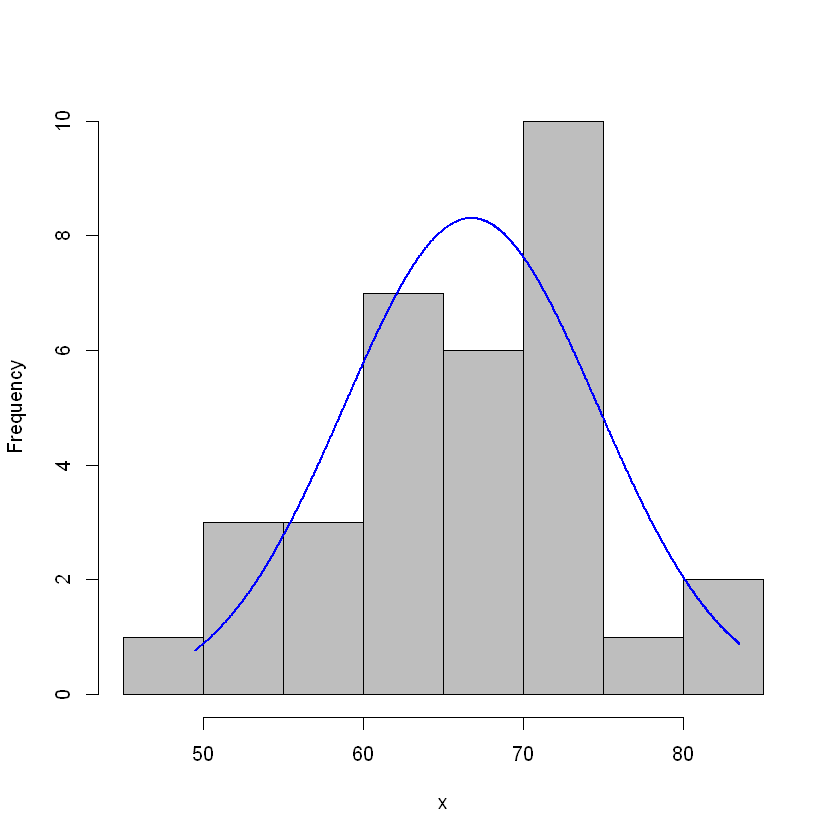

In [36]:
plotNormalHistogram(breakfast1$Baseline.Body.Mass..kg.)

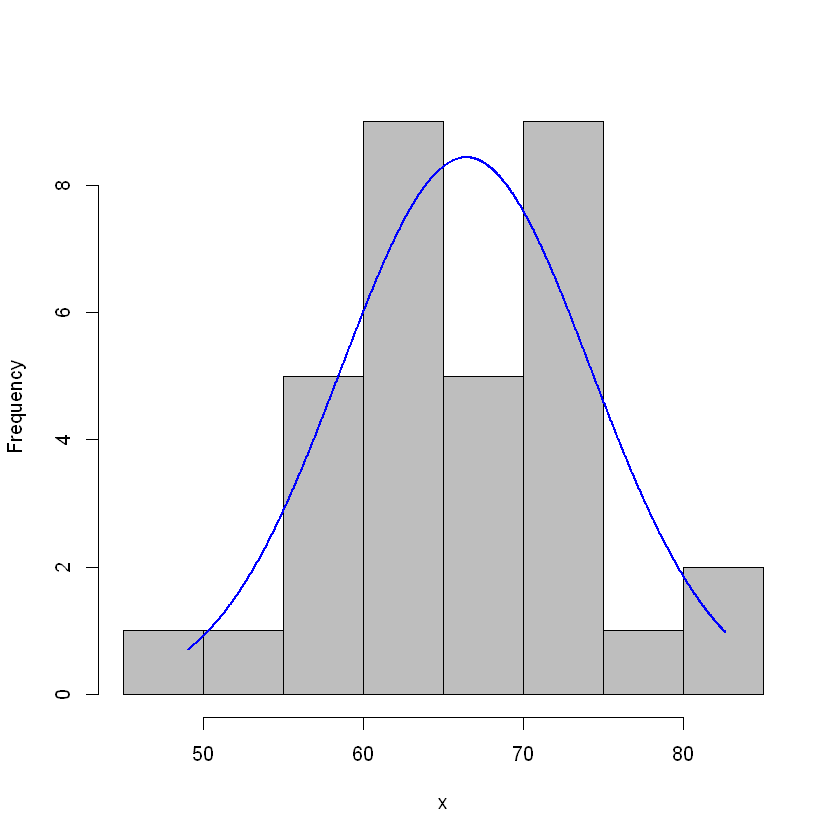

In [37]:
plotNormalHistogram(breakfast1$Follow.Up.Body.Mass..kg.)


#### they look good - normally distributed as is.  now to test for Homogeneity of Variance

In [38]:
leveneTest(repdat ~ Treatment.Group*contrasts, data=breakfast5)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,0.06231531,0.9794777
,62,NA,NA


In [39]:
RManova2 <- aov(repdat~contrasts+Error(Participant.Code), breakfast5)
summary(RManova2)


Error: Participant.Code
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  1  105.3   105.3               

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
contrasts  1      2    1.64   0.027  0.871
Residuals 63   3854   61.17               